# Actuator Selection - Comparison based on state-mpl differences
Model A vs B testing

##### Py Packages

In [1]:
import warnings
import numpy as np
from copy import deepcopy as dc

from functionfile_system_definition import sys_from_file, system_display_matrix
from functionfile_system_mplcost import initial_values_init, actuator_selection_cost_1, estimation_actuator_selection, plot_actuator_selection_2, plot_actuator_selection_comparison_1

## Code

In [2]:
sys_model = 'System Model 5' # Comparing A and B

***
### Model A

##### Code

In [3]:
S_A = sys_from_file(sys_model+'A')
initial_values = initial_values_init(S_A)

System read from file @ system_model/System Model 5A.pickle 



In [4]:
ret1_A = actuator_selection_cost_1(S_A)
S1_A = ret1_A['system']
ret2_A = estimation_actuator_selection(S1_A, initial_values=initial_values)

##### Output

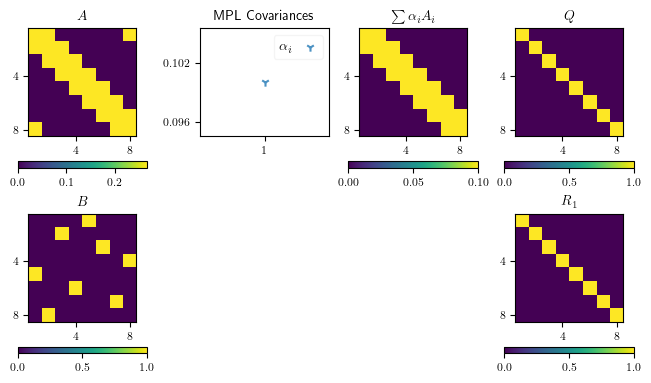

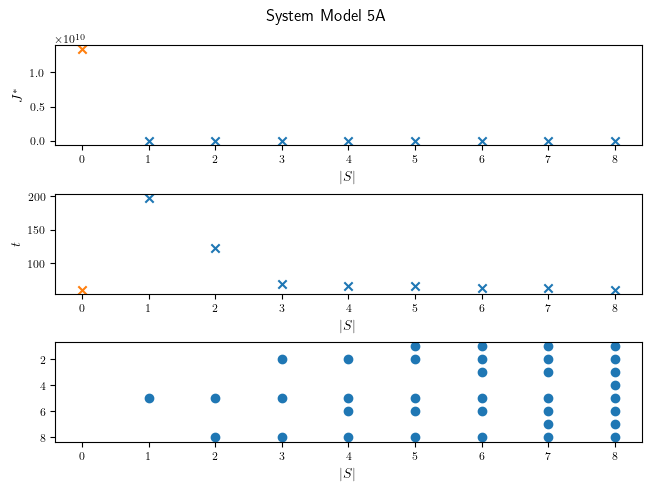

In [5]:
system_display_matrix(S1_A)
plot_actuator_selection_2(ret2_A)

***
### Model B

##### Code

In [6]:
S_B = sys_from_file(sys_model+'B')
initial_values = initial_values_init(S_B)

System read from file @ system_model/System Model 5B.pickle 



In [7]:
ret1_B = actuator_selection_cost_1(S_B)
S1_B = ret1_B['system']
ret2_B = estimation_actuator_selection(S1_B, initial_values=initial_values)

##### Output

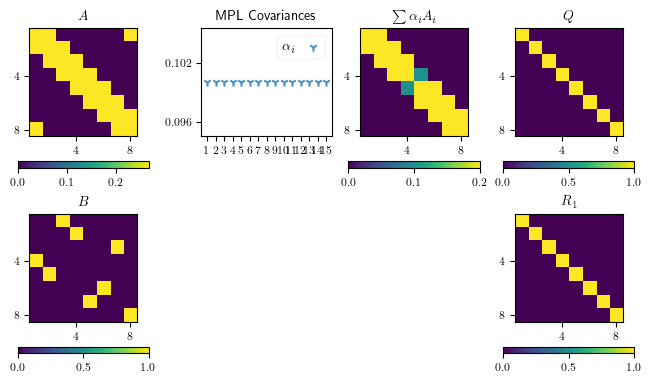

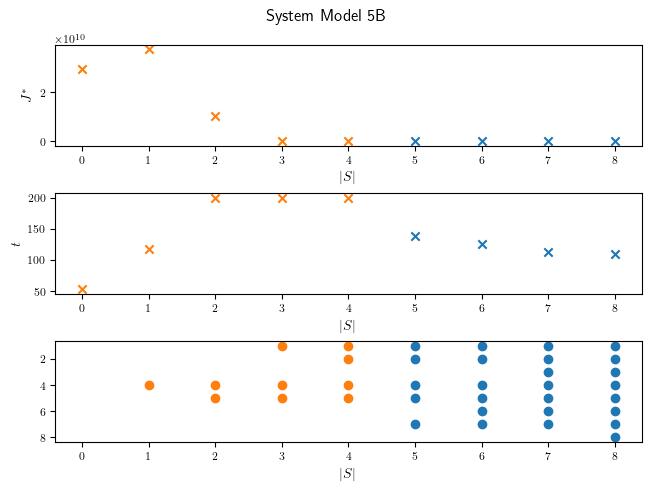

In [8]:
system_display_matrix(S1_B)
plot_actuator_selection_2(ret2_B)

***
## Cost and Actuator Selection comparison

##### Costs

In [9]:
print(sys_model+'A')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    for key in ret2_A:
        if 'cost' in ret2_A[key]:
            print('|S|:', key, ' | cost:', ret2_A[key]['cost'], ' | time:', ret2_A[key]['time'], ' | check:', ret2_A[key]['check'])

System Model 5A
|S|: 0  | cost: 13362770419.301296  | time: 60  | check: 3
|S|: 1  | cost: 183.30243480152467  | time: 197  | check: 0
|S|: 2  | cost: 130.7178270132321  | time: 123  | check: 0
|S|: 3  | cost: 94.32569990899088  | time: 69  | check: 0
|S|: 4  | cost: 86.5626168423458  | time: 65  | check: 0
|S|: 5  | cost: 83.5260351763687  | time: 65  | check: 0
|S|: 6  | cost: 80.84391054630919  | time: 63  | check: 0
|S|: 7  | cost: 79.35694534696303  | time: 62  | check: 0
|S|: 8  | cost: 78.68566863043199  | time: 60  | check: 0


In [10]:
print(sys_model+'B')
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)
    for key in ret2_B:
        if 'cost' in ret2_B[key]:
            print('|S|:', key, ' | cost:', ret2_B[key]['cost'], ' | time:', ret2_B[key]['time'], ' | check:', ret2_B[key]['check'])

System Model 5B
|S|: 0  | cost: 29503926282.68747  | time: 53  | check: 3
|S|: 1  | cost: 37548313667.777084  | time: 117  | check: 3
|S|: 2  | cost: 10241437057.90494  | time: 200  | check: 2
|S|: 3  | cost: 1493929.8033307395  | time: 200  | check: 2
|S|: 4  | cost: 168862.5662453634  | time: 200  | check: 2
|S|: 5  | cost: 284.04957845650796  | time: 139  | check: 0
|S|: 6  | cost: 238.03575329164275  | time: 126  | check: 0
|S|: 7  | cost: 197.42233016282955  | time: 112  | check: 0
|S|: 8  | cost: 185.71558106810213  | time: 110  | check: 0


##### Actuator Selection

In [11]:
if np.allclose(ret2_A['B'], ret2_B['B']):
    print('Both actuator sets are close/equal')
else:
    print('Actuator sets are different')

Actuator sets are different


In [12]:
print(sys_model+'A')
print(ret2_A['B'])

System Model 5A
[[0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]]


In [13]:
print(sys_model+'B')
print(ret2_B['B'])

System Model 5B
[[0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1.]]


##### Comparison Plot

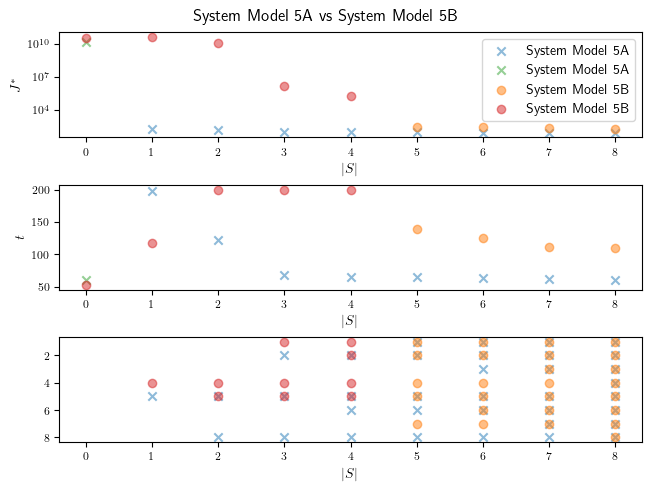

In [14]:
plot_actuator_selection_comparison_1(ret2_A, ret2_B)